# Simulador Laser

Este programa simula la emisión y conteo de fotones en intervalos de tiempo arbitrarios. Observaremos una emisión de fotones característica de la luz coherente.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
N = 100000
NT = 10000000  # 1*10^7  -> 10^-7s, décima de microsegundo
P = float(N) / float(NT)
cuentaf = 0
s = np.zeros(NT)

try:
    file_tiempo = open('serietiempo', 'w')
    for i in range(NT):
        r = np.random.rand()
        if r <= P:
            s[i] = 1.0
        else:
            s[i] = 0.0
        cuentaf += s[i]
        file_tiempo.write(f"{i + 1} {s[i]}\n")
finally:
    file_tiempo.close()

print(cuentaf)

# ***********CONTROL DEL TIEMPO DE CONTEO*************
# el tiempo que se controla aquí, es sobre la serie construida arriba.
NP = 100  # t = NP * 1/NT s
suma = 0
l = 0
serienp = np.zeros(NT)

try:
    file_venta = open('serieventat', 'w')
    for j in range(NT):
        if j % NP != 0:
            suma += s[j]
        else:
            suma += s[j]
            file_venta.write(f"{suma}\n")
            l += 1
            serienp[l] = suma
            suma = 0
finally:
    file_venta.close()

# **********ESTADISTICA*****************************
# promedio y anchura
prom = np.mean(serienp[:l + 1])
print('El promedio es:', prom)

v = np.sum((serienp[:l + 1] - prom) ** 2) / float(l)
sd = np.sqrt(v)
print(sd, sd / np.sqrt(prom), (sd / np.sqrt(prom)) ** 2)

unos = np.sum(serienp[:l + 1] == 1)
print('unos y razon', unos, unos / float(l))

# ********COMPARACION CON POISSON****************
# conteo de 1's
PP = np.exp(-prom) * prom
print('pois(1)', PP)

100088.0
El promedio es: 1.000869991300087
0.9947910549997768 0.9943586073669605 0.988749040044761
unos y razon 37194 0.37194
pois(1) 0.3678793020309734


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


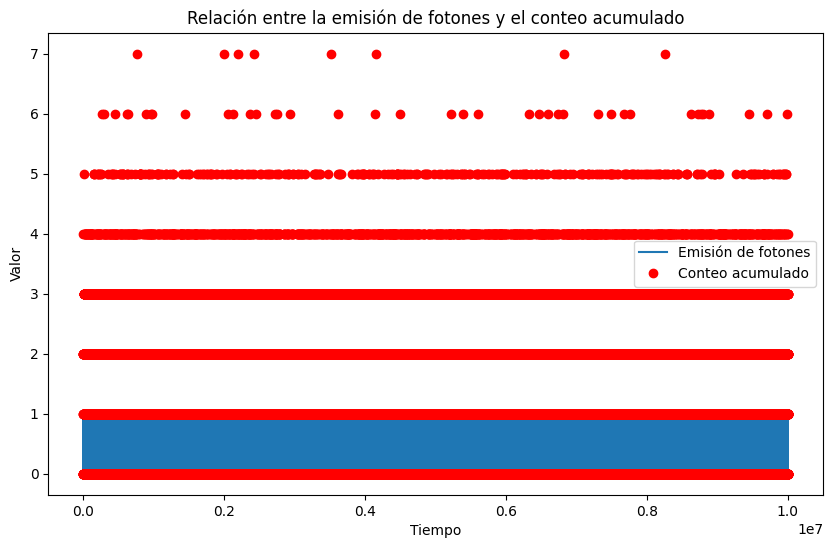

In [6]:
# ********GRAFICAR EL CONTEO CONTRA LA EMISIÓN DE FOTONES*********
# Generar un gráfico de línea para mostrar la relación entre la emisión y el conteo
plt.figure(figsize=(10, 6))
plt.plot(np.arange(NT), s, label='Emisión de fotones')
plt.plot(np.arange(0, NT, NP)[:l + 1], serienp[:l], 'ro', label='Conteo acumulado')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Relación entre la emisión de fotones y el conteo acumulado')
plt.legend()
plt.show()

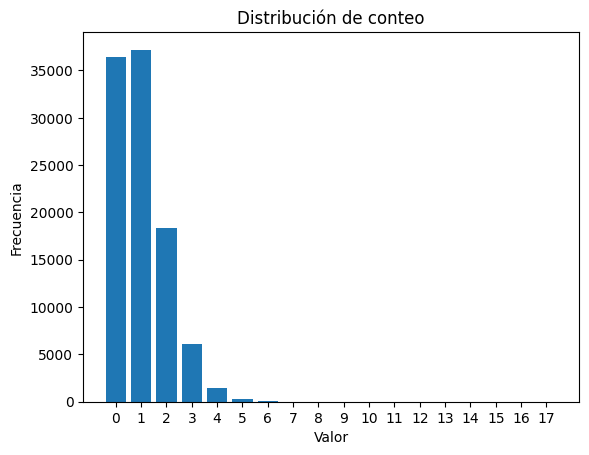

In [8]:
# Este programa lee una serie de tiempo y produce una gráfica de
# distribución de conteo
try:
    with open('serieventat', 'r') as file_entrada:
        datos = [int(round(float(linea.strip()))) for linea in file_entrada]

    N = 100000
    frecuencias = [datos.count(i) for i in range(18)]

    try:
        with open('distriF2', 'w') as file_salida:
            for frecuencia in frecuencias:
                file_salida.write(f"{frecuencia}\n")
    except Exception as e:
        print(f"Error al escribir en el archivo: {e}")
finally:
    # Generar gráfico de la distribución de conteo
    etiquetas = [str(i) for i in range(18)]
    plt.bar(etiquetas, frecuencias)
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.title('Distribución de conteo')
    plt.show()

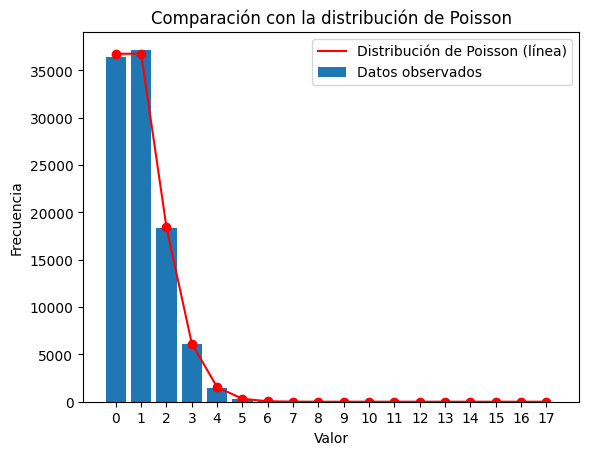

In [9]:
# Generar un histograma de distribución de probabilidad para mostrar la comparación con la distribución de Poisson
from scipy.stats import poisson


etiquetas = [str(i) for i in range(18)]
plt.bar(etiquetas, frecuencias, label='Datos observados')
plt.plot(etiquetas, poisson.pmf(range(18), prom) * l, 'r-', label='Distribución de Poisson (línea)')
plt.plot(etiquetas, poisson.pmf(range(18), prom) * l, 'ro')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Comparación con la distribución de Poisson')
plt.legend()
plt.show()